In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Scatter Plot**

<ipython-input-2-07d17c01c8b3>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


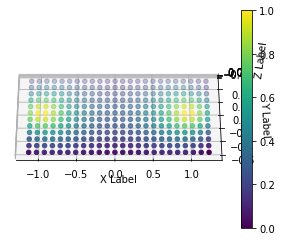

In [2]:
file = np.load("../data/md_h2.npz", allow_pickle=True)
id = 0
plot_points = file["coords"][id]
corr = file["corrs"][id]
density = file["densities"][id]

#corr_density = np.arange(0, 166, 1)
x = plot_points.T[0]
y = plot_points.T[1]
z = plot_points.T[2]
colormap = plt.get_cmap("viridis")
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_array([])

fig = plt.figure()
# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x, y, z, c=density, cmap=colormap, marker='o', s=20)
# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(60, 270)
ax.set_aspect('equal')
cbar = plt.colorbar(sm)
plt.show()

**Matrix Plot of correlation density**

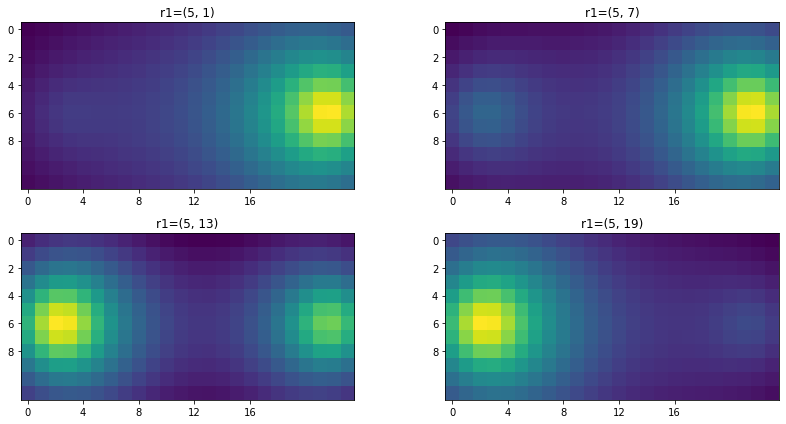

In [7]:
idx = [(5, 1), (5, 7), (5, 13), (5, 19)]
width_ticks = 12
corr_reshaped = corr.reshape((2 * width_ticks ** 2, width_ticks, 2 * width_ticks))
plot_matrices = [corr_reshaped[np.ravel_multi_index(id, (width_ticks, 2 * width_ticks))] for id in idx]

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Iterate through the subplots and matrices
for i, ax in enumerate(axes.flatten()):
    matrix = plot_matrices[i]
    ax.imshow(matrix, cmap='viridis', interpolation='nearest')
    ax.set_title(f"r1={idx[i]}")
    ax.set_xticks(np.arange(0, 20, 4))
    ax.set_yticks(np.arange(0, 10, 2))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Matrix plot of density**

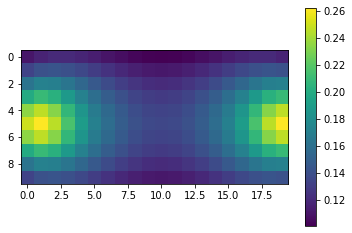

In [ ]:
plot_data = density.reshape((10, 20))
plt.imshow(plot_data, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()